# Exploratory Data Analysis of Weather in Illinois

In [2]:
import pandas as pd # DataFrame library
import numpy as np # Array library
import matplotlib.pyplot as plt # Plotting library

In [3]:
raw_weather_data = pd.read_parquet("./data/raw_weather.parquet", engine = "pyarrow") # load the data based on the desired data types and columns
raw_weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19084993 entries, 0 to 19084992
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   id         string 
 1   date       string 
 2   time       string 
 3   element    string 
 4   value      float64
 5   qflag      string 
 6   latitude   float64
 7   longitude  float64
 8   name       string 
 9   elevation  float64
dtypes: float64(4), string(6)
memory usage: 1.4 GB


In [4]:
raw_weather_data["qflag"].unique() # The qflag represents quality of the measurement (we want the rows that don't have quality issues which is denoted <NA>)

<StringArray>
[<NA>, 'I', 'L', 'D', 'S', 'M', 'O', 'G', 'W', 'X', 'K', 'Z', 'N', 'T', 'R']
Length: 15, dtype: string

In [5]:
raw_weather_data["element"].unique() # Unique elements to gather data from. See the following website for more details https://docs.opendata.aws/noaa-ghcn-pds/readme.html#:~:text=SNWD%20%3D%20Snow%20depth%20(mm),temperature%20(tenths%20of%20degrees%20C)

<StringArray>
['PRCP', 'SNOW', 'SNWD', 'TMIN', 'DAPR', 'SX52', 'TMAX', 'TOBS', 'SN32',
 'EVAP', 'SN52', 'WT01', 'WT04', 'SX32', 'WT03', 'WT06', 'WT11', 'WESD',
 'WESF', 'TAVG', 'MDPR', 'WSFG', 'WDMV', 'MNPN', 'WT05', 'MXPN', 'AWND',
 'PGTM', 'WDF2', 'WDF5', 'WSF2', 'WSF5', 'WT08', 'DASF', 'FMTM', 'TSUN',
 'MDEV', 'WT02', 'WDFG', 'WT14', 'WT16', 'WT18', 'SN53', 'DAEV', 'SX53',
 'MDSF', 'WT09', 'WT15', 'WT17', 'WT07', 'DAWM', 'MDWM', 'WT10', 'PSUN',
 'WT13', 'WT22', 'ACMH', 'WDF1', 'WSF1', 'ACSH', 'ASLP', 'ADPT', 'WT21',
 'RHMX', 'WT19', 'RHAV', 'AWBT', 'ASTP', 'RHMN', 'WV18', 'SN02', 'SN03',
 'SX03', 'SX02', 'SX12', 'SN12', 'WV03', 'WV20', 'WV01']
Length: 79, dtype: string

In [6]:
element_count = raw_weather_data.groupby("element")["element"].count().sort_values() # counting the total number of occurrences of an element for each element
element_count

element
WV01          1
WV18          1
PSUN          2
WT10         13
WV20         19
         ...   
TMIN    1678326
TMAX    1679119
SNWD    2693577
SNOW    3964602
PRCP    5183260
Name: element, Length: 79, dtype: int64

In [7]:
num_of_stations = raw_weather_data["name"].nunique() # number of stations in Illinois
num_of_stations

1950

In [8]:
raw_weather_data.shape

(19084993, 10)

In [9]:
raw_weather_data["time"].fillna("0000", inplace = True) # replace all nan values with "0000"

In [10]:
np.sort(raw_weather_data["time"].apply(len).unique()) # helps to verify how many unique length characters there was in the "time" column. 
# there should only be one of length 4 characters to be able to parse into datetime format.

array([4])

In [11]:
raw_weather_data["time"] = raw_weather_data["time"].apply(lambda x: f"{x[:-2]}:{x[-2:]}:00") # added a seconds placeholder for parsing
raw_weather_data["time"] = pd.to_timedelta(raw_weather_data["time"]) # converts string format to datetime format for the time column

In [12]:
raw_weather_data["date"] = pd.to_datetime(raw_weather_data["date"]) # converts the string format to a datetime format for the date column
raw_weather_data["date"] = raw_weather_data["date"] + raw_weather_data["time"] # combines date and time into the same column which can be accessed via object attributes
raw_weather_data.drop(columns = ["time"], inplace = True) # drops the redundant time column
raw_weather_data = raw_weather_data[raw_weather_data["qflag"].isna()].drop(columns = ["qflag"]) # gets rid of the rows that have quality issues
raw_weather_data["elevation"] = raw_weather_data["elevation"] / 10 * 3.281 # converting elevation in tenths of meters to feet
raw_weather_data

,id,date,element,value,latitude,longitude,name,elevation
0,USC00111458,1997-09-01 07:00:00,PRCP,0.0,41.0092,-87.8242,CHEBANSE 5 E RIVER,59.51734
1,USC00111664,1997-12-28 07:00:00,PRCP,0.0,38.5047,-88.4094,CISNE 2 S,45.40904
2,USC00115935,1997-10-02 07:00:00,PRCP,0.0,39.9842,-90.7525,MT STERLING,70.90241
3,USC00119241,1997-11-13 07:00:00,PRCP,0.0,39.4408,-90.3789,WHITE HALL 1 E,58.00808
4,USC00110187,1997-03-15 16:00:00,PRCP,0.0,37.5222,-89.2486,ANNA 4 N,59.28767
...,...,...,...,...,...,...,...,...
19084988,USC00119021,1994-10-04 07:00:00,TMIN,78.0,40.7939,-87.7544,WATSEKA 2NW,62.79834
19084989,USC00119021,1994-11-29 07:00:00,TOBS,-28.0,40.7939,-87.7544,WATSEKA 2NW,62.79834
19084990,USC00119021,1994-03-02 07:00:00,TOBS,-72.0,40.7939,-87.7544,WATSEKA 2NW,62.79834
19084991,USC00119021,1994-03-12 07:00:00,TOBS,17.0,40.7939,-87.7544,WATSEKA 2NW,62.79834


In [13]:
desired_elements = ["TMIN", "TMAX", "TOBS", "TSUN", "PRCP", "SNOW", "SNWD"] # elements of interest
desired_data = raw_weather_data[raw_weather_data["element"].isin(desired_elements)]

### The cell below pivots the element values into columns which are more useful in column format.

In [14]:
desired_weather_pivot = desired_data.pivot(columns = "element", values = "value")
desired_weather_pivot

element,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,TSUN
0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
19084987,NaN,NaN,NaN,NaN,178.0,NaN,NaN
19084988,NaN,NaN,NaN,NaN,78.0,NaN,NaN
19084989,NaN,NaN,NaN,NaN,NaN,-28.0,NaN
19084990,NaN,NaN,NaN,NaN,NaN,-72.0,NaN


In [15]:
transformed_data = pd.concat([desired_data, desired_weather_pivot], axis = 1) # combine the newly generated columns with the existing dataframe
transformed_data.drop_duplicates(inplace = True)
transformed_data.drop(columns = ["element", "value"], inplace = True) # drop the element and value columns
transformed_data = transformed_data[transformed_data["date"].dt.year != 2024] # drops the rows that contain the year 2024 (an artifact of concatenating the dataframes from earlier)
transformed_data

,id,date,latitude,longitude,name,elevation,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,TSUN
0,USC00111458,1997-09-01 07:00:00,41.0092,-87.8242,CHEBANSE 5 E RIVER,59.51734,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00111664,1997-12-28 07:00:00,38.5047,-88.4094,CISNE 2 S,45.40904,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00115935,1997-10-02 07:00:00,39.9842,-90.7525,MT STERLING,70.90241,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00119241,1997-11-13 07:00:00,39.4408,-90.3789,WHITE HALL 1 E,58.00808,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00110187,1997-03-15 16:00:00,37.5222,-89.2486,ANNA 4 N,59.28767,0.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19084987,USC00119021,1994-07-17 07:00:00,40.7939,-87.7544,WATSEKA 2NW,62.79834,NaN,NaN,NaN,NaN,178.0,NaN,NaN
19084988,USC00119021,1994-10-04 07:00:00,40.7939,-87.7544,WATSEKA 2NW,62.79834,NaN,NaN,NaN,NaN,78.0,NaN,NaN
19084989,USC00119021,1994-11-29 07:00:00,40.7939,-87.7544,WATSEKA 2NW,62.79834,NaN,NaN,NaN,NaN,NaN,-28.0,NaN
19084990,USC00119021,1994-03-02 07:00:00,40.7939,-87.7544,WATSEKA 2NW,62.79834,NaN,NaN,NaN,NaN,NaN,-72.0,NaN


In [15]:
def unit_conversion(df, element_label):
    """Converts the columns in the dataframe to the appropriate units.

    Args:
        df (pandas.DataFrame): the dataframe that contains the columns that need conversion
        element_label (str): the name of the columns that need to be converted
    
    Raises:
        Exception: If you provide a label that isn't in the list of conditionals, it will throw an error.

    Returns:
        pandas.Series: A series of values will be returned at the end of the conversion.
    """
    if (element_label == "TMIN") or (element_label == "TMAX") or (element_label == "TOBS"):
        return 9/5 * (df[element_label] / 10) + 32
    elif (element_label == "PRCP") or (element_label == "SNOW") or (element_label == "SNWD"):
        return (df[element_label] / 10) * (1 / 25.4)
    else:
        raise Exception("Invalid element label. You must pick one of the appropriate element types TMIN, TMAX, TOBS, PRCP, SNOW, or SNWD.")

transformed_data.loc[:, "TMIN"] = unit_conversion(transformed_data, "TMIN")
transformed_data.loc[:, "TMAX"] = unit_conversion(transformed_data, "TMAX")
transformed_data.loc[:, "TOBS"] = unit_conversion(transformed_data, "TOBS")
transformed_data.loc[:, "PRCP"] = unit_conversion(transformed_data, "PRCP")
transformed_data.loc[:, "SNOW"] = unit_conversion(transformed_data, "SNOW")
transformed_data.loc[:, "SNWD"] = unit_conversion(transformed_data, "SNWD")

### This cell below plots the minimum, maximum, and observed temperatures.

#### Note: ``pandas.DataFrame.plot`` attribute can be used to shorten the time to make a plot. The tradeoff is less customization of the plot.

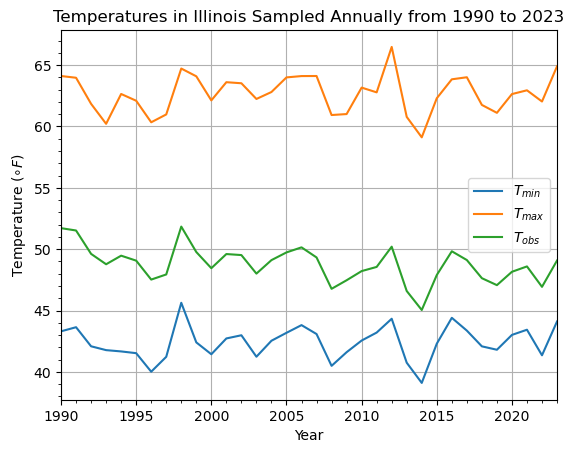

In [38]:
# Resample the temperature data annually and calculate the mean
temp_data = transformed_data[["date", "TMIN", "TMAX", "TOBS"]]
temp_data.set_index("date", inplace = True)
resampled_temp_data = temp_data.resample("Y").mean()
resampled_temp_data.index = pd.to_datetime(resampled_temp_data.index)
tmin_label = r"$T_{min}$"
tmax_label = r"$T_{max}$"
tobs_label = r"$T_{obs}$"

# Plotting TMIN, TMAX, and TOBS
plt.plot(resampled_temp_data.index.year, resampled_temp_data["TMIN"], label= tmin_label)
plt.plot(resampled_temp_data.index.year, resampled_temp_data["TMAX"], label= tmax_label)
plt.plot(resampled_temp_data.index.year, resampled_temp_data["TOBS"], label= tobs_label)

# Set labels and title
plt.xlabel("Year")
plt.ylabel(r"Temperature ($\circ F$)")
plt.title("Temperatures in Illinois Sampled Annually from 1990 to 2023")

# Display the legend
plt.legend(loc="best")

# Fixes the x-range so that it's between 1990 and 2023
plt.xlim(resampled_temp_data.index.year.min(), resampled_temp_data.index.year.max())

# Display the grid
plt.grid()

# Display minor ticks
plt.minorticks_on()

# Show the plot
plt.show()

In [84]:
def moving_avg_plot(df, window_interval):
    """Creates a moving average plot specified at a certain interval.

    Args:
        df (pandas.DataFrame): dataframe used to preform the rolling average plot
        window_interval (int): the amount of years we want to do the rolling average over (i.e. 1 year, 3 years, etc.)
    """
    

    moving_average_temp_data = df.rolling(window = window_interval, min_periods = 1).mean()


    # Plotting TMIN, TMAX, and TOBS with moving averages
    plt.plot(moving_average_temp_data.index.year, moving_average_temp_data["TMIN"], label=tmin_label)
    plt.plot(moving_average_temp_data.index.year, moving_average_temp_data["TMAX"], label=tmax_label)
    plt.plot(moving_average_temp_data.index.year, moving_average_temp_data["TOBS"], label=tobs_label)


    # Set labels and title
    plt.xlabel("Year")
    plt.ylabel(r"Temperature ($\circ$F)")
    plt.title(f"{window_interval}-Year Moving Average of Temperatures in Illinois")

    # Display the legend
    plt.legend(loc="best")

    # Adjust the x-range to accommodate the moving average calculation
    plt.xlim(moving_average_temp_data.index.year.min(), moving_average_temp_data.index.year.max())

    # Display the grid
    plt.grid()

    # Display minor ticks
    plt.minorticks_on()

    # Show the plot
    plt.show()

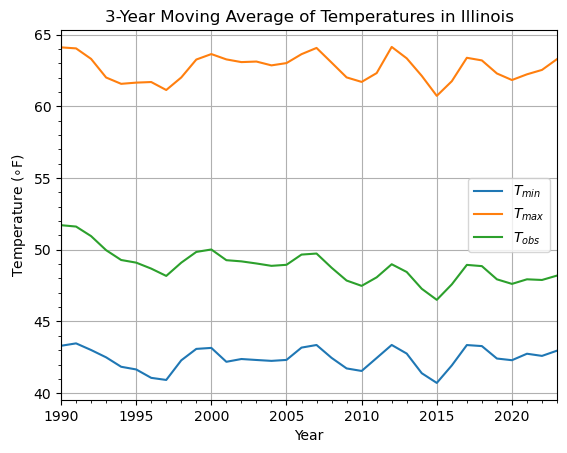

In [86]:
moving_avg_plot(resampled_temp_data, 3)

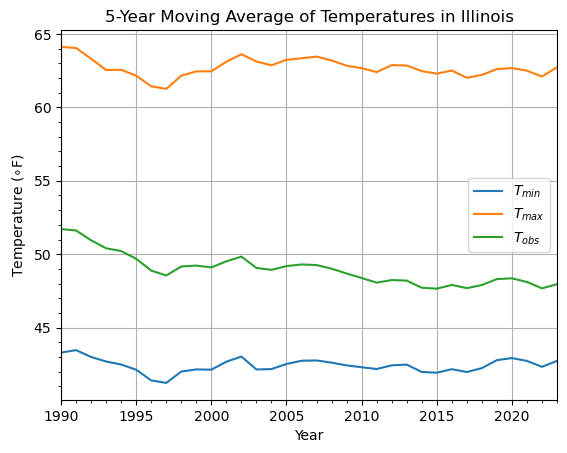

In [87]:
moving_avg_plot(resampled_temp_data, 5)

### The cell below plots the temeprature difference for the minimum, maximum, and observed temperatures.

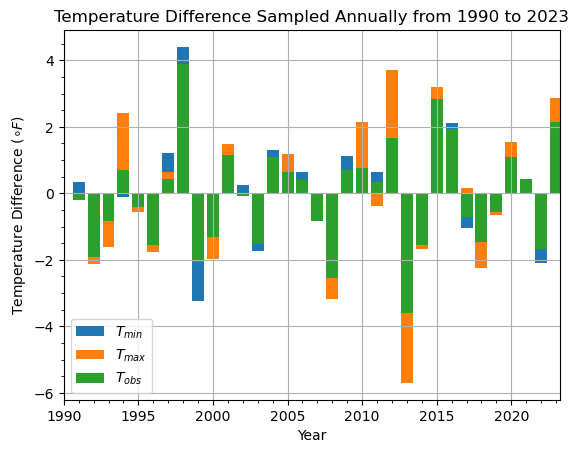

In [65]:
# Plotting the temperature gradient (difference) for TMIN, TMAX, TOBS
plt.bar(resampled_temp_data.index.year, resampled_temp_data["TMIN"].diff(), label = tmin_label)
plt.bar(resampled_temp_data.index.year, resampled_temp_data["TMAX"].diff(), label = tmax_label)
plt.bar(resampled_temp_data.index.year, resampled_temp_data["TOBS"].diff(), label = tobs_label)

# Adding labels and legend
plt.xlabel("Year")
plt.ylabel(r"Temperature Difference ($\circ F$)")
plt.legend(loc = "lower left")

# Fix the x-range so that all the bars for each year display properly
plt.xlim(resampled_temp_data.index.year.min(), resampled_temp_data.index.year.max() + 0.25)

# Adding a title
plt.title("Temperature Difference Sampled Annually from 1990 to 2023")

# Display grid and minor ticks
plt.grid()
plt.minorticks_on()

# Show the plot
plt.show()

### The cells below gives us statistics on the number of observations per station.

In [23]:
num_obs_per_station = transformed_data.groupby("name", as_index = False)["date"].count() # number of observations per station w.r.t. TMIN, TMAX, TOBS
num_obs_per_station.rename(columns = {"date": "obs_count"}, inplace = True)
num_obs_per_station.sort_values(by = "obs_count")

,name,obs_count
402,CLARENDON HILLS 0.6 S,1
164,BLOOMINGTON 4.3 ENE,16
1602,RUSHVILLE 2.4 S,25
100,BARTLETT 1.4 SE,26
859,INA,28
...,...,...
1242,MT CARROLL,73232
867,JACKSONVILLE 2E,73530
1509,PRINCETON,74088
327,CHAMPAIGN 3S,74207


In [24]:
num_obs_per_station.describe()

,obs_count
count,1950.000000
mean,8520.056923
std,15827.572785
min,1.000000
25%,684.250000
50%,2078.500000
75%,7178.000000
max,74230.000000


In [25]:
stations_in_between_quantiles = (num_obs_per_station["obs_count"] > num_obs_per_station["obs_count"].quantile(0.25)) & (num_obs_per_station["obs_count"] < num_obs_per_station["obs_count"].quantile(0.75))
num_obs_per_station[stations_in_between_quantiles].sort_values(by = "obs_count")

,name,obs_count
1928,WOODSTOCK 1.5 WSW,685
1911,WINTHROP HARBOR 0.2 SE,687
1306,NILES 0.7 NE,688
64,ATHENS 2.4 NNW,688
420,COLLISON 2.0 SE,688
...,...,...
1932,WORTH 0.1 E,7106
996,LINCOLNSHIRE 1.3 WSW,7122
837,HOMER 2.1 NNE,7130
1567,ROCKFORD 1.5 ENE,7159
